In [ ]:
#Hey folks!
#Quick Instructions:-To understand the goal of the follwing codes,read the marked green hashtag lines.
#This is a project of Metroville Progress Tracking Analysis
#This is a Project management project with Key Performance Indicators(KPIs),bottlenecks and predicted vs actual 
#budget analysis to predict the timeframe and budget of this construction work to be completed.

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'Siemens metroville.csv'
data = pd.read_csv(file_path)

# Now here,displaying the first few rows to understand its structure
print(data.head())

               Unnamed: 0  Unnamed: 1               Unnamed: 2  \
0      Track Installation         NaN                      NaN   
1                 Segment  Planned Mi  Completed Mi (Previous)   
2  Central Urban Corridor       19 mi                    12 mi   
3   Southeastern Quadrant       15 mi                     6 mi   
4         Eastern Section       12 mi                     6 mi   

               Unnamed: 3    Unnamed: 4                 Unnamed: 5  \
0                     NaN           NaN                        NaN   
1  Completed Mi (Current)  % Completion  Completed Mi % (Previous)   
2                   16 mi           84%                        63%   
3                   10 mi           67%                        40%   
4                    6 mi           50%                        50%   

                   Unnamed: 6  \
0                         NaN   
1  Completed Mi % (This Week)   
2                         21%   
3                         27%   
4                

In [4]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Track Installation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Segment,Planned Mi,Completed Mi (Previous),Completed Mi (Current),% Completion,Completed Mi % (Previous),Completed Mi % (This Week),Notes
2,Central Urban Corridor,19 mi,12 mi,16 mi,84%,63%,21%,Advanced machinery and night shifts increased ...
3,Southeastern Quadrant,15 mi,6 mi,10 mi,67%,40%,27%,Recent equipment upgrades significantly improv...
4,Eastern Section,12 mi,6 mi,6 mi,50%,50%,0%,No progress due to rocky terrain. Exploring al...
5,Western Industrial Area,22 mi,9 mi,16 mi,73%,41%,32%,Accelerated progress with enhanced equipment d...
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Electrification,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Component,Planned Units,Completed Units (Previous),Completed Units (Current),% Completion,Completed Units % (Previous),Completed Units % (This Week),Notes
9,Track Electrification,68 mi,24 mi,30 mi,38%,30%,8%,Significant progress with 6 mi electrified rec...


In [5]:
data.columns = ['Segment', 'Planned Mi', 'Completed Mi (Previous)', 'Completed Mi (Current)', '% Completion', 'Completed Mi % (Previous)', 'Completed Mi % (This Week)', 'Notes']


In [7]:
data

,Segment,Planned Mi,Completed Mi (Previous),Completed Mi (Current),% Completion,Completed Mi % (Previous),Completed Mi % (This Week),Notes
0,Track Installation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Segment,Planned Mi,Completed Mi (Previous),Completed Mi (Current),% Completion,Completed Mi % (Previous),Completed Mi % (This Week),Notes
2,Central Urban Corridor,19 mi,12 mi,16 mi,84%,63%,21%,Advanced machinery and night shifts increased ...
3,Southeastern Quadrant,15 mi,6 mi,10 mi,67%,40%,27%,Recent equipment upgrades significantly improv...
4,Eastern Section,12 mi,6 mi,6 mi,50%,50%,0%,No progress due to rocky terrain. Exploring al...
5,Western Industrial Area,22 mi,9 mi,16 mi,73%,41%,32%,Accelerated progress with enhanced equipment d...
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Electrification,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Component,Planned Units,Completed Units (Previous),Completed Units (Current),% Completion,Completed Units % (Previous),Completed Units % (This Week),Notes
9,Track Electrification,68 mi,24 mi,30 mi,38%,30%,8%,Significant progress with 6 mi electrified rec...


In [10]:
data.isnull().nunique()

Segment                       2
Planned Mi                    2
Completed Mi (Previous)       2
Completed Mi (Current)        2
% Completion                  2
Completed Mi % (Previous)     2
Completed Mi % (This Week)    2
Notes                         2
dtype: int64

In [15]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Selecting the column to impute 
column_to_impute = data.iloc[:, 3:4].values




In [16]:
column_to_impute

array([[nan],
       ['Completed Mi (Current)'],
       ['16 mi'],
       ['10 mi'],
       ['6 mi'],
       ['16 mi'],
       [nan],
       [nan],
       ['Completed Units (Current)'],
       ['30 mi'],
       ['2'],
       [nan],
       [nan],
       ['Actual ($M)'],
       ['22'],
       ['55'],
       ['80'],
       ['110'],
       ['90'],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=object)

In [21]:
data.dropna()

,Segment,Planned Mi,Completed Mi (Previous),Completed Mi (Current),% Completion,Completed Mi % (Previous),Completed Mi % (This Week),Notes
1,Segment,Planned Mi,Completed Mi (Previous),Completed Mi (Current),% Completion,Completed Mi % (Previous),Completed Mi % (This Week),Notes
2,Central Urban Corridor,19 mi,12 mi,16 mi,84%,63%,21%,Advanced machinery and night shifts increased ...
3,Southeastern Quadrant,15 mi,6 mi,10 mi,67%,40%,27%,Recent equipment upgrades significantly improv...
4,Eastern Section,12 mi,6 mi,6 mi,50%,50%,0%,No progress due to rocky terrain. Exploring al...
5,Western Industrial Area,22 mi,9 mi,16 mi,73%,41%,32%,Accelerated progress with enhanced equipment d...
8,Component,Planned Units,Completed Units (Previous),Completed Units (Current),% Completion,Completed Units % (Previous),Completed Units % (This Week),Notes
9,Track Electrification,68 mi,24 mi,30 mi,38%,30%,8%,Significant progress with 6 mi electrified rec...
10,Substations Construction,5,2,2,40%,40%,0%,No new substations completed. Delay in electri...


In [62]:
data = pd.DataFrame(data_values, columns=['Segment','Planned Mi','Completed Mi (Previous)','Completed Mi (Current)','% Completion','Completed Mi % (Previous)','Completed Mi % (This Week)','Notes'])


In [70]:
# Convert columns to cleaned strings first as this a part of data prepocessing
data['Planned Mi'] = data['Planned Mi'].astype(str).str.replace(' mi', '', regex=False)
data['Completed Mi (Previous)'] = data['Completed Mi (Previous)'].astype(str).str.replace(' mi', '', regex=False)
data['Completed Mi (Current)'] = data['Completed Mi (Current)'].astype(str).str.replace(' mi', '', regex=False)

# Convert the cleaned strings to numeric values
data['Planned Mi'] = pd.to_numeric(data['Planned Mi'], errors='coerce')
data['Completed Mi (Previous)'] = pd.to_numeric(data['Completed Mi (Previous)'], errors='coerce')
data['Completed Mi (Current)'] = pd.to_numeric(data['Completed Mi (Current)'], errors='coerce')
# Verifying the conversion to proceed more further without any errors
print(data[['Planned Mi', 'Completed Mi (Previous)', 'Completed Mi (Current)']].head())

   Planned Mi  Completed Mi (Previous)  Completed Mi (Current)
1        19.0                     12.0                    16.0
2        15.0                      6.0                    10.0
3        12.0                      6.0                     6.0
4        22.0                      9.0                    16.0
5         NaN                      NaN                     NaN


/var/folders/ln/dwwkswm94rj5vqqnh0pkd_h00000gp/T/ipykernel_12971/3045259762.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segment', y='Planned Mi', data=data, color='blue', label='Planned', ci=None)
/var/folders/ln/dwwkswm94rj5vqqnh0pkd_h00000gp/T/ipykernel_12971/3045259762.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segment', y='Completed Mi (Current)', data=data, color='green', label='Completed', ci=None)


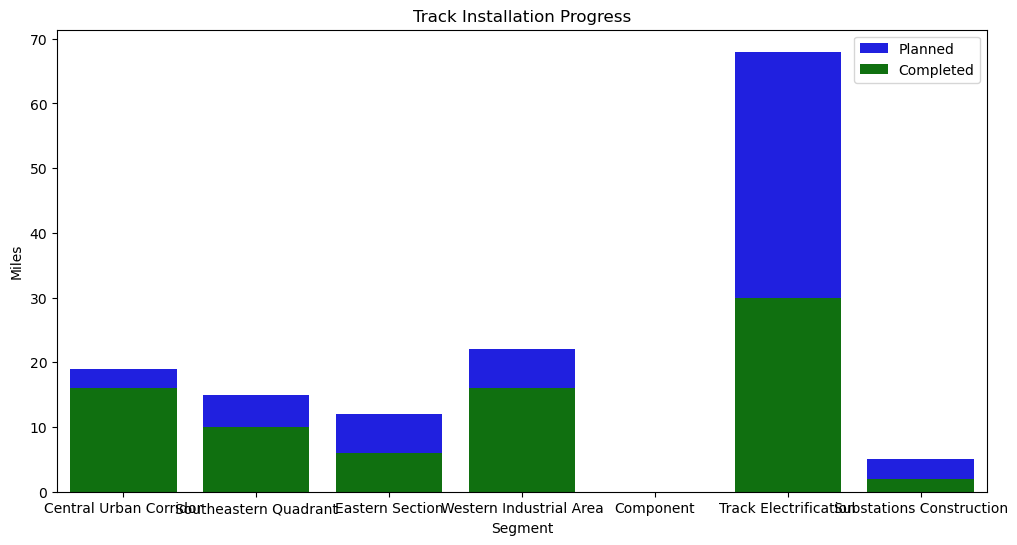

In [71]:
# Plot Track Installation Progress domian
plt.figure(figsize=(12, 6))

# Then Plot Planned Miles
sns.barplot(x='Segment', y='Planned Mi', data=data, color='blue', label='Planned', ci=None)

# And then Plot Completed Miles
sns.barplot(x='Segment', y='Completed Mi (Current)', data=data, color='green', label='Completed', ci=None)

plt.title('Track Installation Progress')
plt.xlabel('Segment')
plt.ylabel('Miles')
plt.legend()
plt.show()

In [76]:
print(data.head())

                   Segment  Planned Mi  Completed Mi (Previous)  \
1   Central Urban Corridor        19.0                     12.0   
2    Southeastern Quadrant        15.0                      6.0   
3          Eastern Section        12.0                      6.0   
4  Western Industrial Area        22.0                      9.0   
5                Component         NaN                      NaN   

   Completed Mi (Current)  % Completion     Completed Mi % (Previous)  \
1                    16.0           84%                           63%   
2                    10.0           67%                           40%   
3                     6.0           50%                           50%   
4                    16.0           73%                           41%   
5                     NaN  % Completion  Completed Units % (Previous)   

      Completed Mi % (This Week)  \
1                            21%   
2                            27%   
3                             0%   
4             

In [84]:
# Ensuring  the '% Completion' column is of string type first as the data is not clean
data['% Completion'] = data['% Completion'].astype(str).str.replace('%', '', regex=False)

# Converting  the '% Completion' column to numeric values as 
data['% Completion'] = pd.to_numeric(data['% Completion'], errors='coerce')


#Now we will process the bottleneck segments
#For those who don't know what bottleneck is :

#In project management or any performance-tracking scenario,bottlenecks are critical points or areas where progress
#is significantly slower than desired, causing delays or inefficiencies in the overall process. Identifying these 
#bottlenecks is crucial for addressing issues and improving the performance or completion rates.


# Filter for bottlenecks
bottlenecks = data[data['% Completion'] < 60]

# Print the bottleneck segments
print("Bottleneck Segments:", bottlenecks[['Segment', '% Completion']])

Bottleneck Segments:                     Segment  % Completion
3           Eastern Section          50.0
6     Track Electrification          38.0
7  Substations Construction          40.0


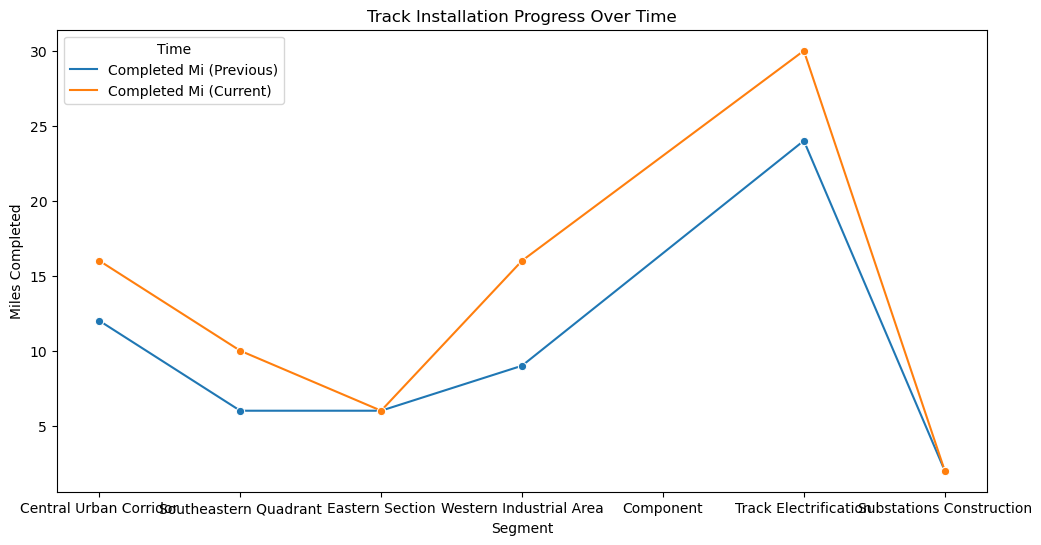

In [88]:
plt.figure(figsize=(12, 6))
data_melted = data.melt(id_vars=['Segment'], value_vars=['Completed Mi (Previous)', 'Completed Mi (Current)'], var_name='Time', value_name='Miles Completed')
sns.lineplot(x='Segment', y='Miles Completed', hue='Time', data=data_melted, marker='o')
plt.title('Track Installation Progress Over Time')
plt.xlabel('Segment')
plt.ylabel('Miles Completed')
plt.show()


<Figure size 1200x600 with 0 Axes>

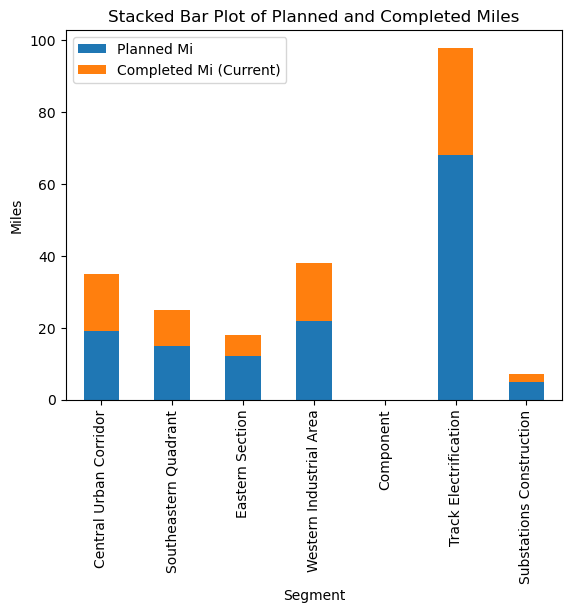

In [91]:
plt.figure(figsize=(12, 6))
data.set_index('Segment')[['Planned Mi', 'Completed Mi (Current)']].plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Planned and Completed Miles')
plt.xlabel('Segment')
plt.ylabel('Miles')
plt.show()

<Figure size 1000x600 with 0 Axes>

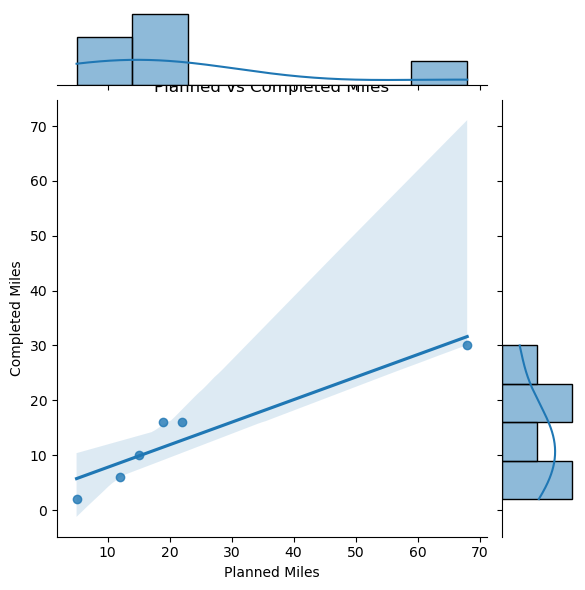

In [92]:
# Joint Plot for Planned vs Completed Miles
plt.figure(figsize=(10, 6))
sns.jointplot(x='Planned Mi', y='Completed Mi (Current)', data=data, kind='reg')
plt.title('Planned vs Completed Miles')
plt.xlabel('Planned Miles')
plt.ylabel('Completed Miles')
plt.show()

/Applications/anaconda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

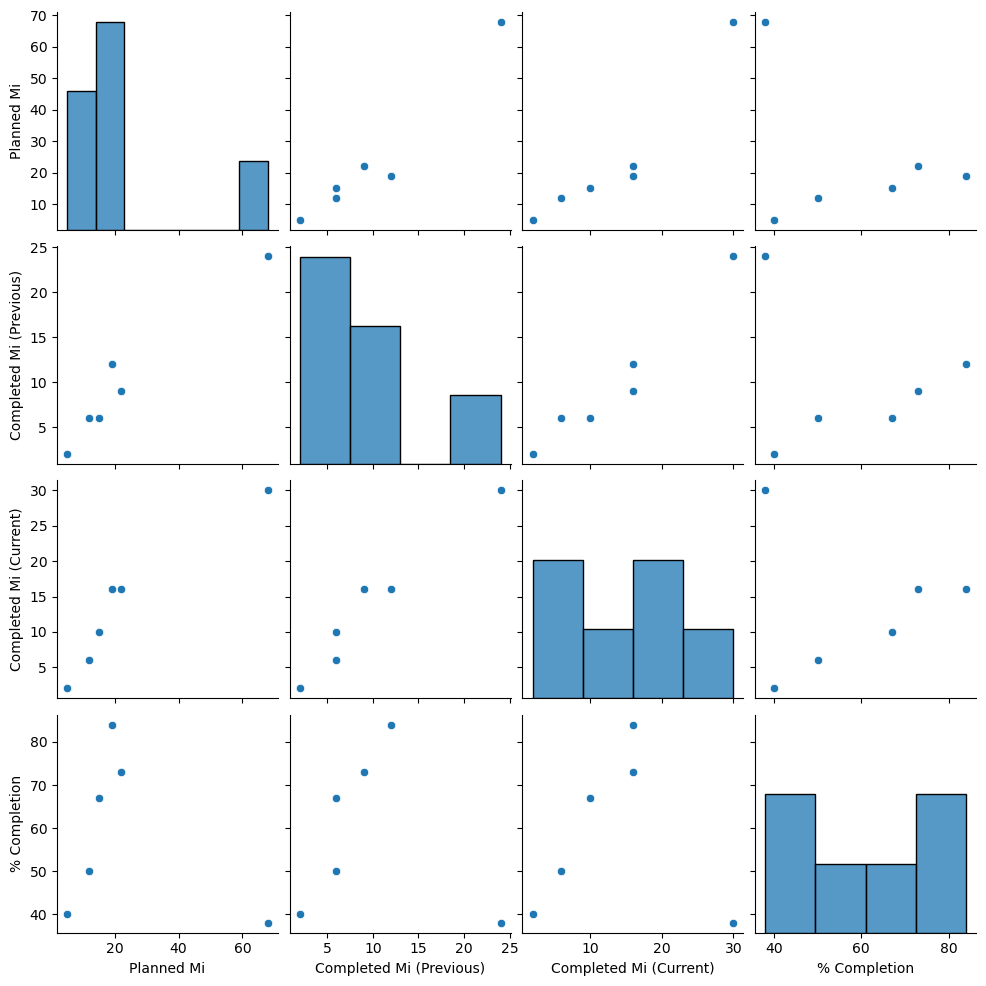

In [96]:
# Pair Plot of Key Metrics
plt.figure(figsize=(10, 6))
sns.pairplot(data[['Planned Mi', 'Completed Mi (Previous)', 'Completed Mi (Current)', '% Completion']])
plt.show()

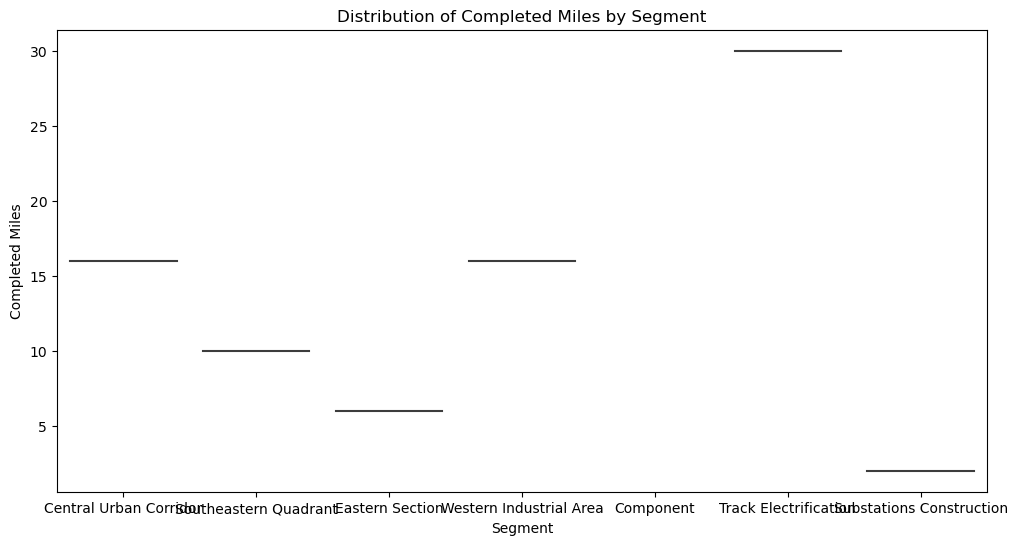

In [97]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Segment', y='Completed Mi (Current)', data=data)
plt.title('Distribution of Completed Miles by Segment')
plt.xlabel('Segment')
plt.ylabel('Completed Miles')
plt.show()


In [112]:
milestones = ['M1', 'M2', 'M3', 'M4', 'M5']
planned_budget = np.array([20, 50, 75, 100, 120])
actual_budget = np.array([22, 55, 80, 110, 90])
projected_budget = np.array([22, 55, 80, 100, 125])

# Calculating the differences
diff_actual_planned = actual_budget - planned_budget
diff_projected_actual = projected_budget - actual_budget



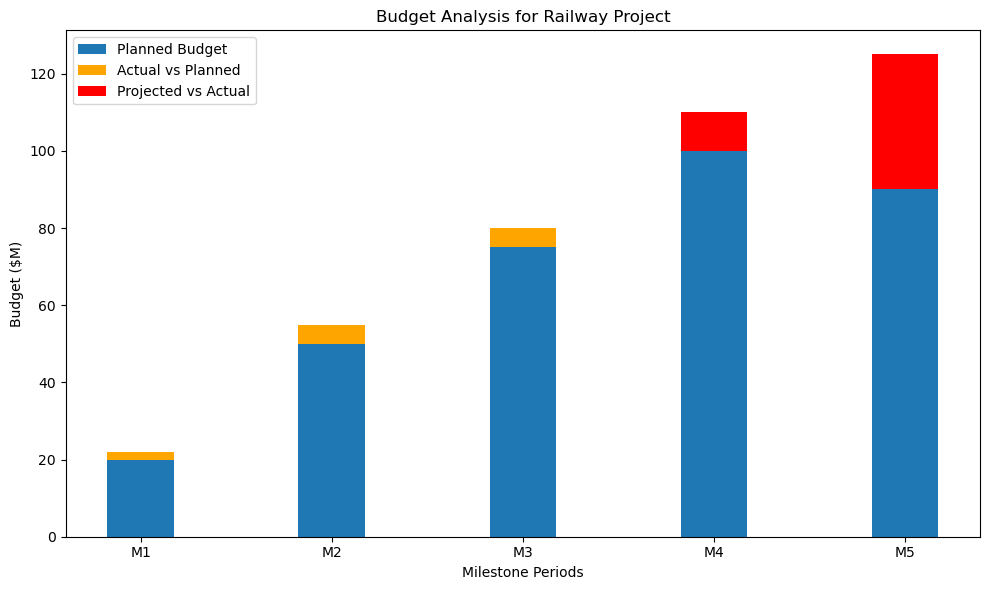

In [108]:
# Creating the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Ploting the bars
bar_width = 0.35
bar1 = ax.bar(milestones, planned_budget, bar_width, label='Planned Budget')
bar2 = ax.bar(milestones, diff_actual_planned, bar_width, bottom=planned_budget, label='Actual vs Planned', color='orange')
bar3 = ax.bar(milestones, diff_projected_actual, bar_width, bottom=actual_budget, label='Projected vs Actual', color='red')

# Adding labels, title, and legend
ax.set_xlabel('Milestone Periods')
ax.set_ylabel('Budget ($M)')
ax.set_title('Budget Analysis for Railway Project')
ax.legend()

# Displaying the plot
plt.xticks(milestones)
plt.tight_layout()
plt.show()

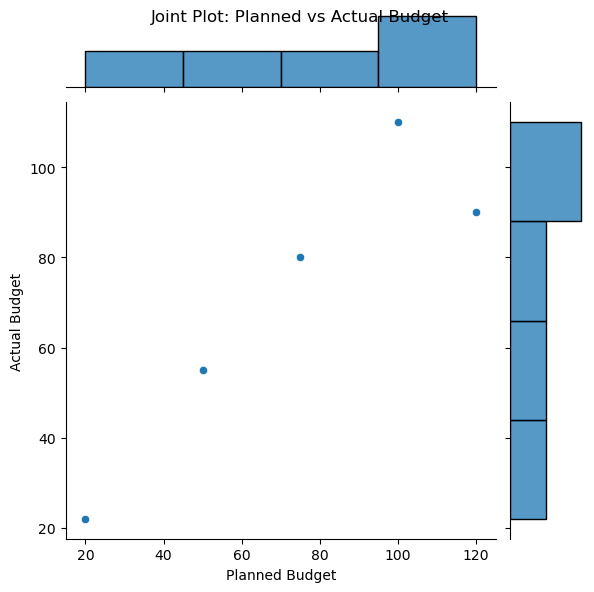

In [114]:
data = {
    'Milestone': milestones,
    'Planned Budget': planned_budget,
    'Actual Budget': actual_budget
}

# Converting to DataFrame
df_budget = pd.DataFrame(data)

# Joining plot
sns.jointplot(data=df_budget, x='Planned Budget', y='Actual Budget', kind='scatter')
plt.suptitle('Joint Plot: Planned vs Actual Budget')
plt.show()

/Applications/anaconda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


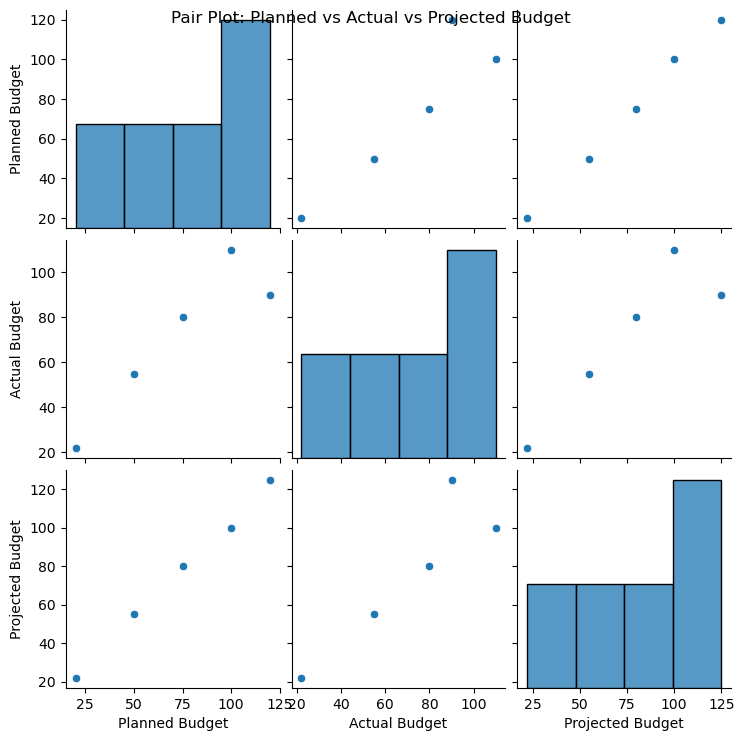

In [115]:
projected_budget = [22, 55, 80, 100, 125]
df_budget['Projected Budget'] = projected_budget

# Pairing plot
sns.pairplot(df_budget, vars=['Planned Budget', 'Actual Budget', 'Projected Budget'], kind='scatter')
plt.suptitle('Pair Plot: Planned vs Actual vs Projected Budget')
plt.show()

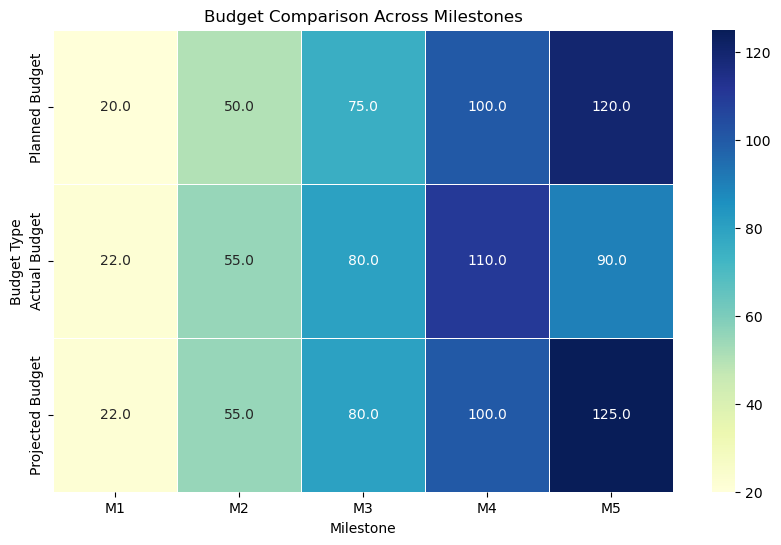

In [117]:
df_heatmap = df_budget.set_index('Milestone').T

# Ploting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=.5)
plt.title('Budget Comparison Across Milestones')
plt.xlabel('Milestone')
plt.ylabel('Budget Type')
plt.show()

/var/folders/ln/dwwkswm94rj5vqqnh0pkd_h00000gp/T/ipykernel_12971/410585638.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_budget['Planned Budget'], label='Planned Budget', hist=False)
/var/folders/ln/dwwkswm94rj5vqqnh0pkd_h00000gp/T/ipykernel_12971/410585638.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

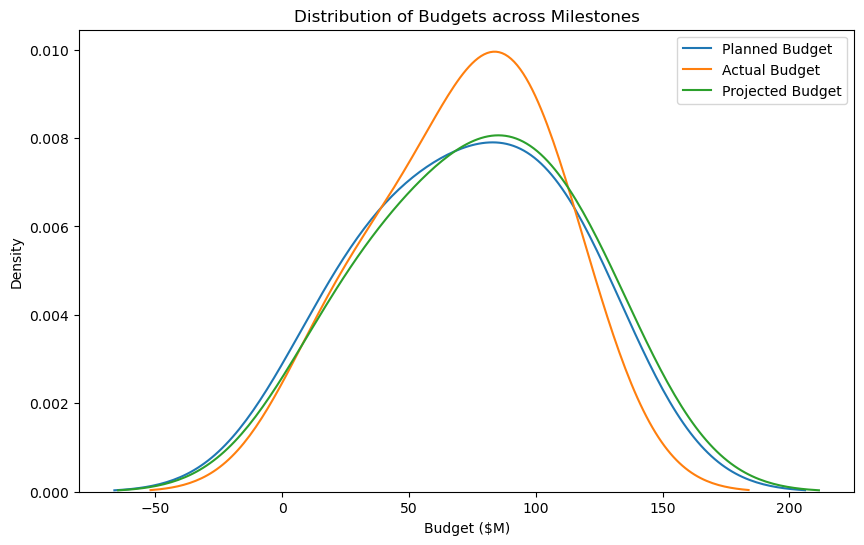

In [118]:
#Plotting heat map
plt.figure(figsize=(10, 6))

sns.distplot(df_budget['Planned Budget'], label='Planned Budget', hist=False)
sns.distplot(df_budget['Actual Budget'], label='Actual Budget', hist=False)
sns.distplot(df_budget['Projected Budget'], label='Projected Budget', hist=False)

plt.title('Distribution of Budgets across Milestones')
plt.xlabel('Budget ($M)')
plt.ylabel('Density')
plt.legend()
plt.show()